## EDA on Drug Review Dataset

### Atributes
    
    1. drugName (categorical): name of drug
    2. condition (categorical): name of condition
    3. review (text): patient review
    4. rating (numerical): 10 star patient rating
    5. date (date: date of review entry
    6. usefulCount (numerical): number of user who found reviews useful

### Questions
    * Types of questions we can ask?
    * What is the most popular drug?
    * What are the gruops/classification of drugs used?
    * Which drug has the best review?
    * How many drugs do we have?
    * The number of drugs per condition
    * Number of patients that searched on a particular drug
    * How genuien is the review? (Sing sentiment Analysis
    * How many reviewsare positive,negative,neutral?
    * Correlation between rating and review and users who found the review useful
    * Can you predict the rating using the review?
    * Distribution of rating
    * Amount o review made per year and per month
    * Which condition has the most review on drug

In [1]:
# Load pkgs
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# sentiment pkg
from textblob import TextBlob

### Questions on Drugs
    * How many drugs do we have?
    * What is the most popular drug?
    * What are the groups/classification of drugs used?
    * Which Drug has the best revoew?
    * The number of drugs per condition
    * Number of patients that searched on a particular drug

In [4]:
# load dataset
df = pd.read_csv("drug_review_dataset.csv")

In [5]:
# preview dataset
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [7]:
# missing values
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

### Narative
    * Most of the missing values are in the condition column
    * This implies that a number of people don't know their condition by name or privacy

### Questions on Drugs
    * How may drugs do we have?

In [8]:
# number of drugs we have
print('We have:', len(df['drugName'].unique()), 'unique drugs')

We have: 3436 unique drugs


In [9]:
# what is the most popular drug
df['drugName'].value_counts()

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Omnipaque 350                           1
Vontrol                                 1
Ivabradine                              1
Neo-Poly-Dex                            1
Grifulvin V                             1
Name: drugName, Length: 3436, dtype: int64

In [10]:
# Our top 20 most popular drugs
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Medroxyprogesterone                    995
Citalopram                             995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

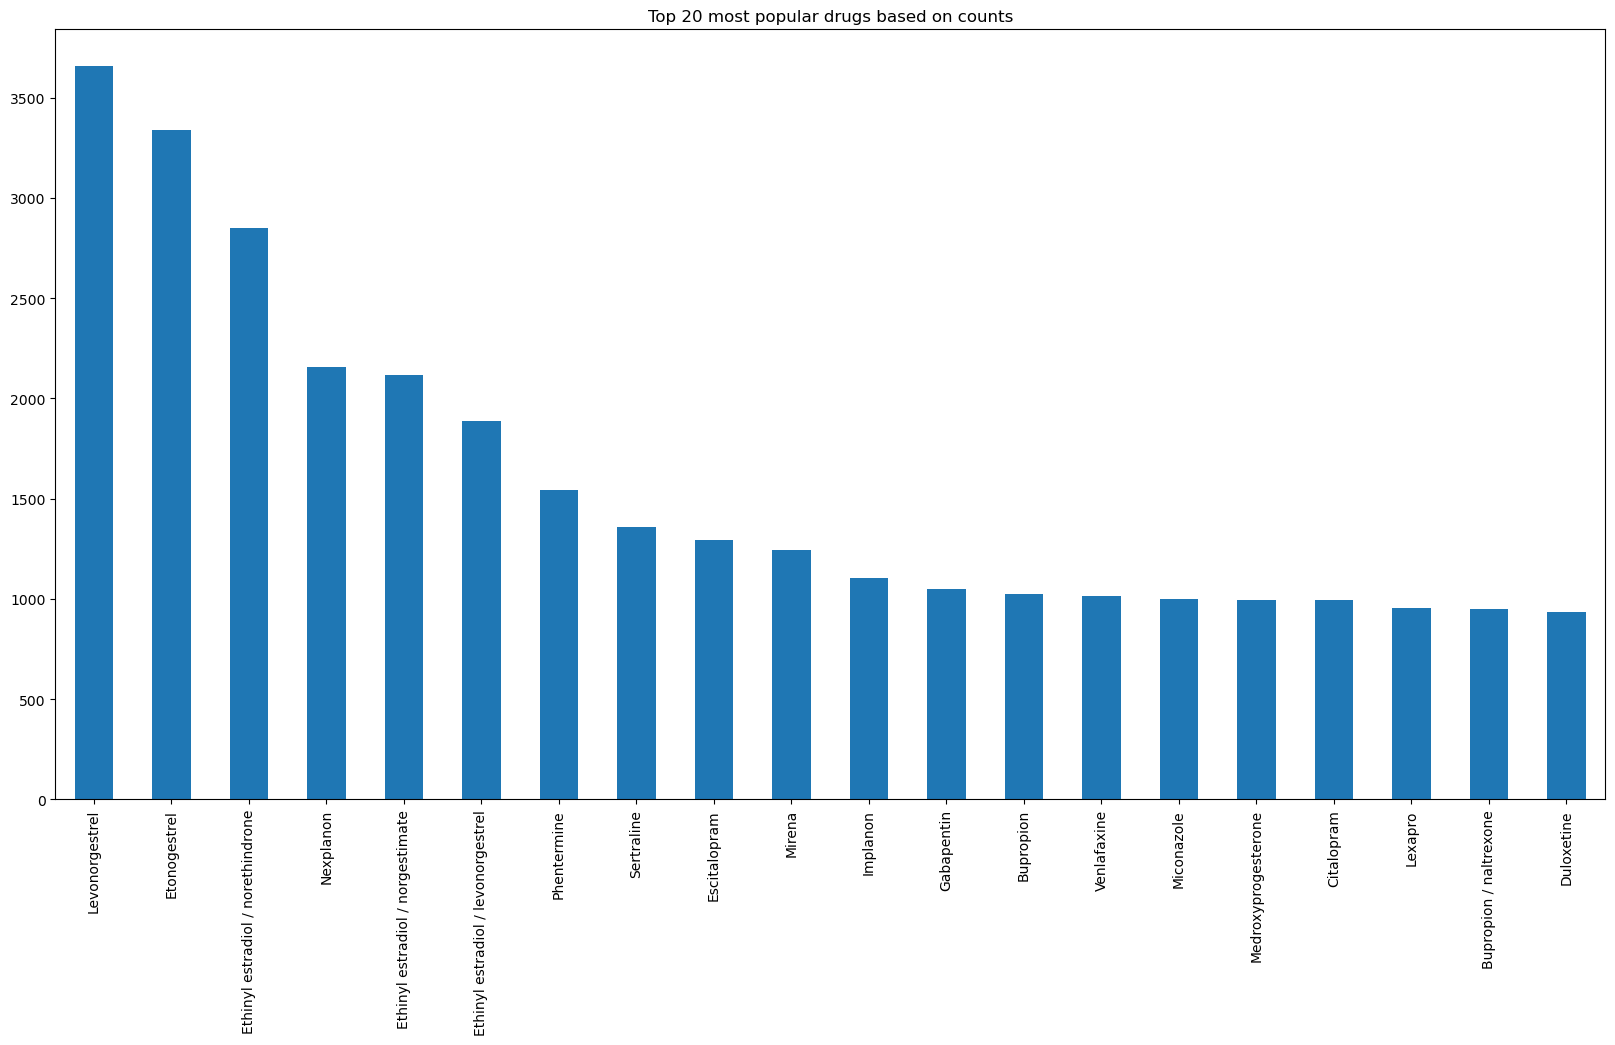

In [11]:
# top 20 drug (bar plot)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 most popular drugs based on counts")
plt.show()

In [12]:
# Least 20 Drugs (Most Popular)
df['drugName'].value_counts().nsmallest(20)

Clemastine                         1
Topicort LP                        1
Smoothie Readi-Cat 2               1
Ipratropium Inhalation Solution    1
Olux-E                             1
Hexachlorophene                    1
Pedi-Dri                           1
Ginseng                            1
Lincocin                           1
EnLyte                             1
Tums Smoothies                     1
Purinethol                         1
Aldomet                            1
Midol Extended Relief              1
Travel-Eze                         1
Ponatinib                          1
Wal-finate                         1
Ciclodan                           1
Niacinamide                        1
Fragmin                            1
Name: drugName, dtype: int64

In [13]:
### What are the groups/classification of drugs used?
# defined drug sufixes
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [14]:
# function to return drug classification based on suffix
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [15]:
# test classify function
classify_drug('Metoclopramide')

'oral hypoglycemics'

In [16]:
# classify drug
df['drug_class'] = df['drugName'].apply(classify_drug)

In [17]:
df[['drugName','drug_class']].head()

,drugName,drug_class
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None


In [18]:
# How many groups of drugs by class
len(df['drug_class'].unique())

23

In [19]:
# Which of class of drug is most common
df['drug_class'].value_counts()

antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: drug_class, dtype: int64

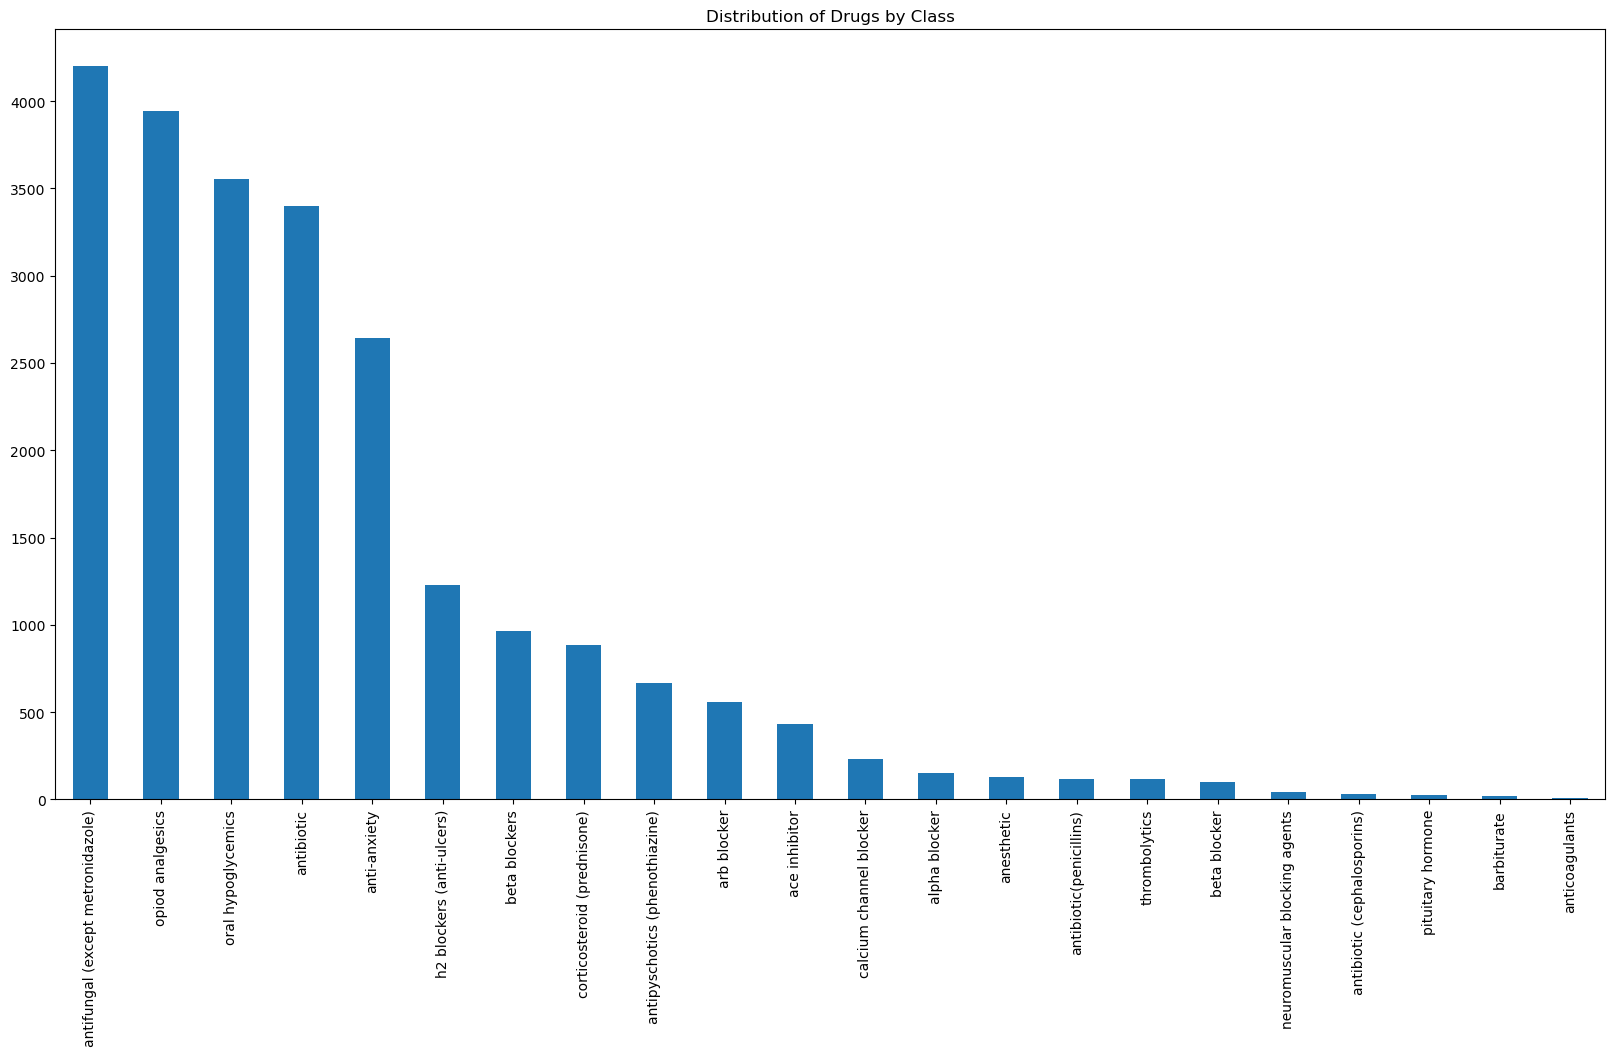

In [20]:
# Which drug is the most common (plot)
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().plot(kind='bar')
plt.title("Distribution of Drugs by Class")
plt.show()

### Narrative
    The most common class of drugs used is
        * Antifungal
        * Opiod Analgesics (Pain Killers)
        * Oral Hypoglycemics (DM)
        * Antibiotic

In [21]:
# Distribution of drugs per drug group based on isze
drug_groups = df.groupby('drug_class').size()

In [22]:
type(drug_groups)

pandas.core.series.Series

In [23]:
# Convert to Dataframe
# MEthod 1
drug_groups.to_frame()

,0
drug_class,
ace inhibitor,432
alpha blocker,153
anesthetic,129
anti-anxiety,2645
antibiotic,3401
antibiotic (cephalosporins),29
antibiotic(penicillins),119
anticoagulants,9
antifungal (except metronidazole),4201


In [24]:
# method 2
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index, 'counts':drug_groups.values})

In [25]:
drug_groups_df.head()

,drug_class,counts
0,ace inhibitor,432
1,alpha blocker,153
2,anesthetic,129
3,anti-anxiety,2645
4,antibiotic,3401


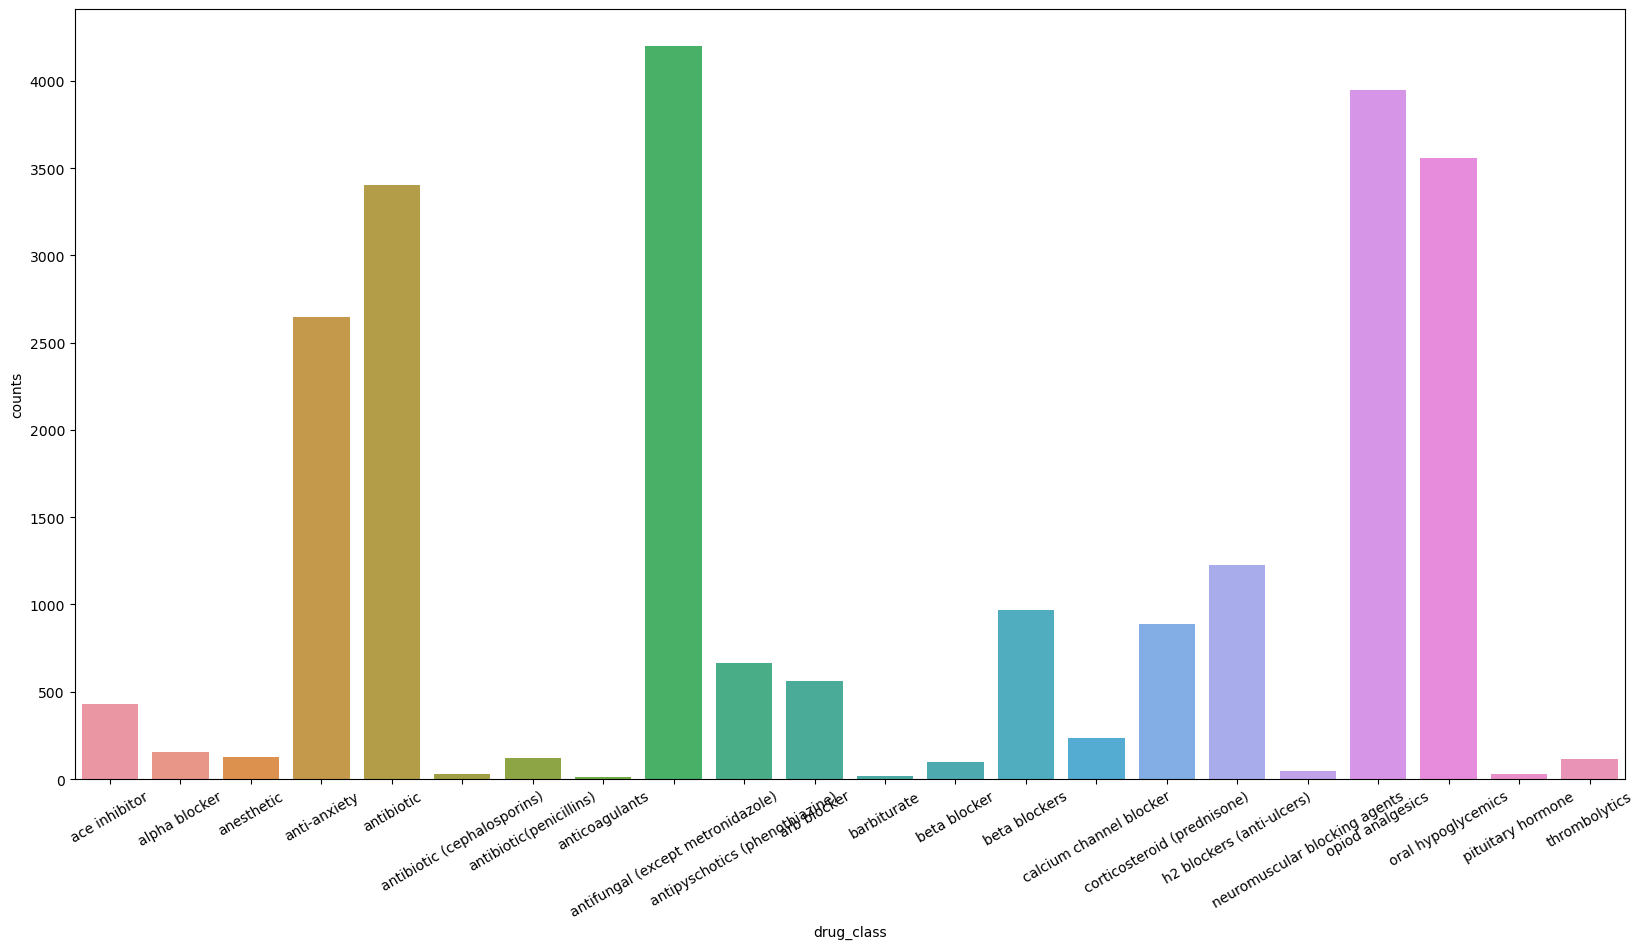

In [26]:
# seaborn plot
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
locs, label = plt.xticks(rotation=30)
plt.show()

### Questions on Conditions
    * How many conditions are there?
    * Which condition are the most comon?
    * Distribution of conditions and rating

In [27]:
# Number oc Conditions
len(df['condition'].unique())

885

### Narative
    * We have 885 different conditions

In [28]:
# Distribution of Condition
df['condition'].value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [29]:
# The 20 Most common Conditions
df['condition'].value_counts().nlargest(20)

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

<Axes: >

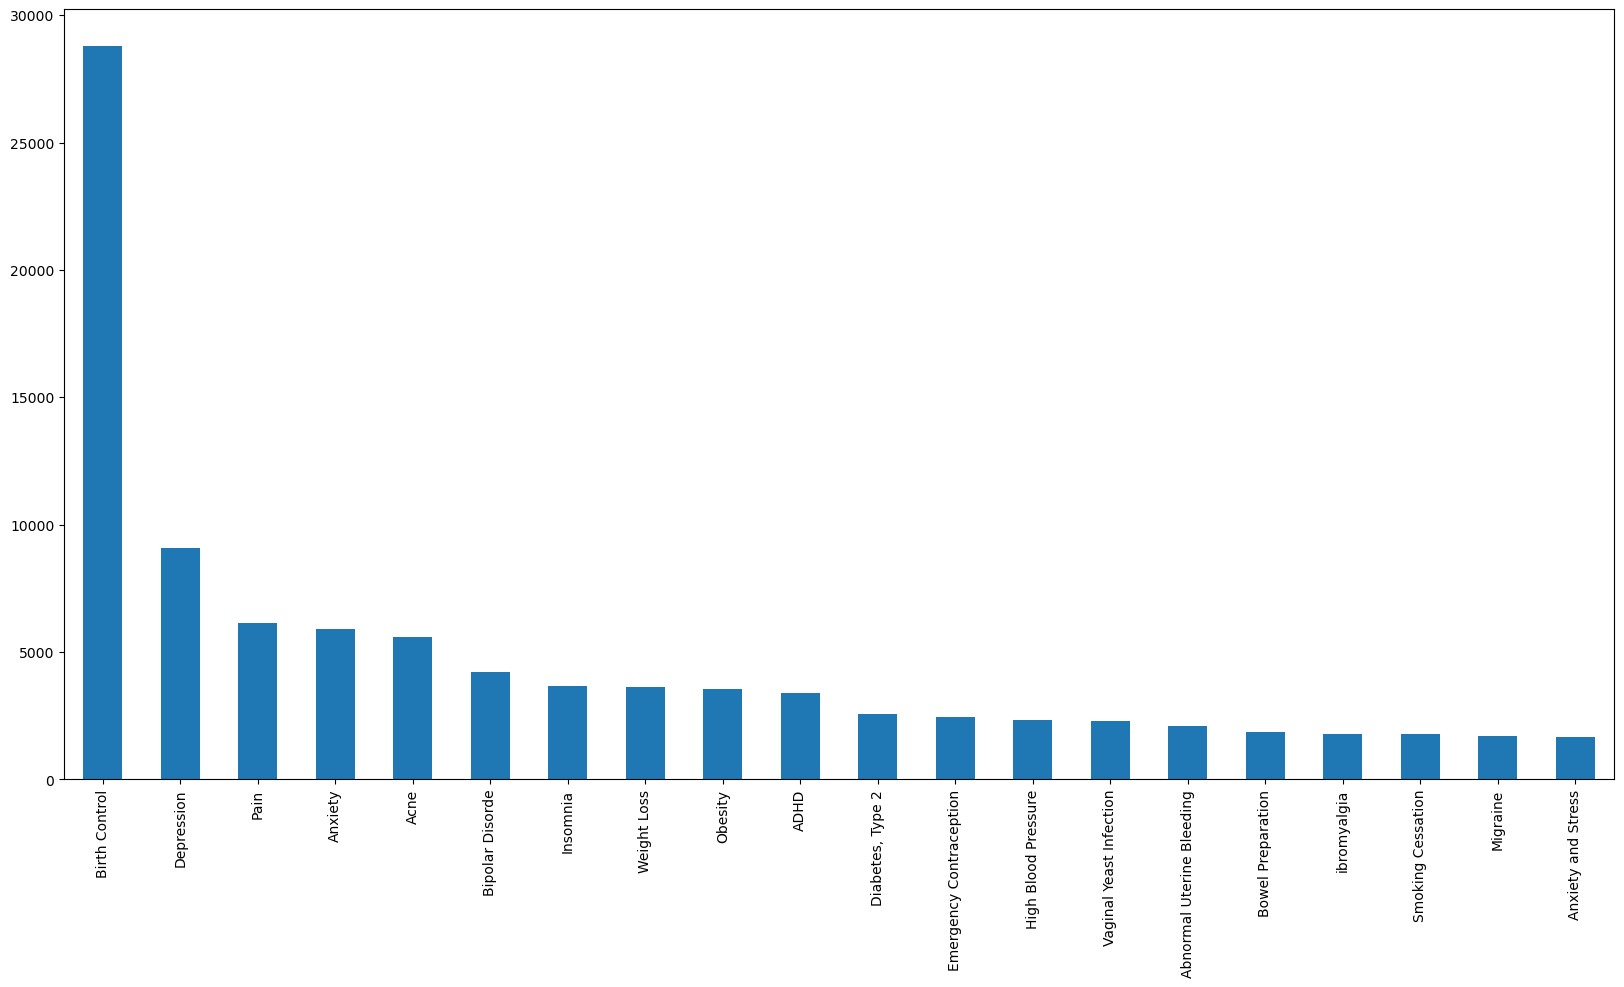

In [30]:
# the 20 most common condition (plot)
df['condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))

### Narrative
    * The most ommon condition is birth control, followed by depression, pain and Anxiety

In [32]:
# least common 20
df['condition'].value_counts().nsmallest(20)

Meningococcal Meningitis Prophylaxis                     1
mist (                                                   1
Cluster-Tic Syndrome                                     1
Syringomyelia                                            1
Gestational Diabetes                                     1
Aspergillosis, Aspergilloma                              1
Pseudogout, Prophylaxis                                  1
Portal Hypertension                                      1
Reversal of Nondepolarizing Muscle Relaxants             1
47</span> users found this comment helpful.              1
Short Stature for Age                                    1
Neurotic Depression                                      1
Cerebral Edema                                           1
me                                                       1
Hyperuricemia Secondary to Chemotherapy                  1
Prevention of Perinatal Group B Streptococcal Disease    1
Small Bowel or Pancreatic Fistula                       

### Questions on Drugs and Condtions
    * How many drugs per condition

In [36]:
# how many drugs per conditon
df.groupby('condition')['drugName'].nunique().nlargest(20)

condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

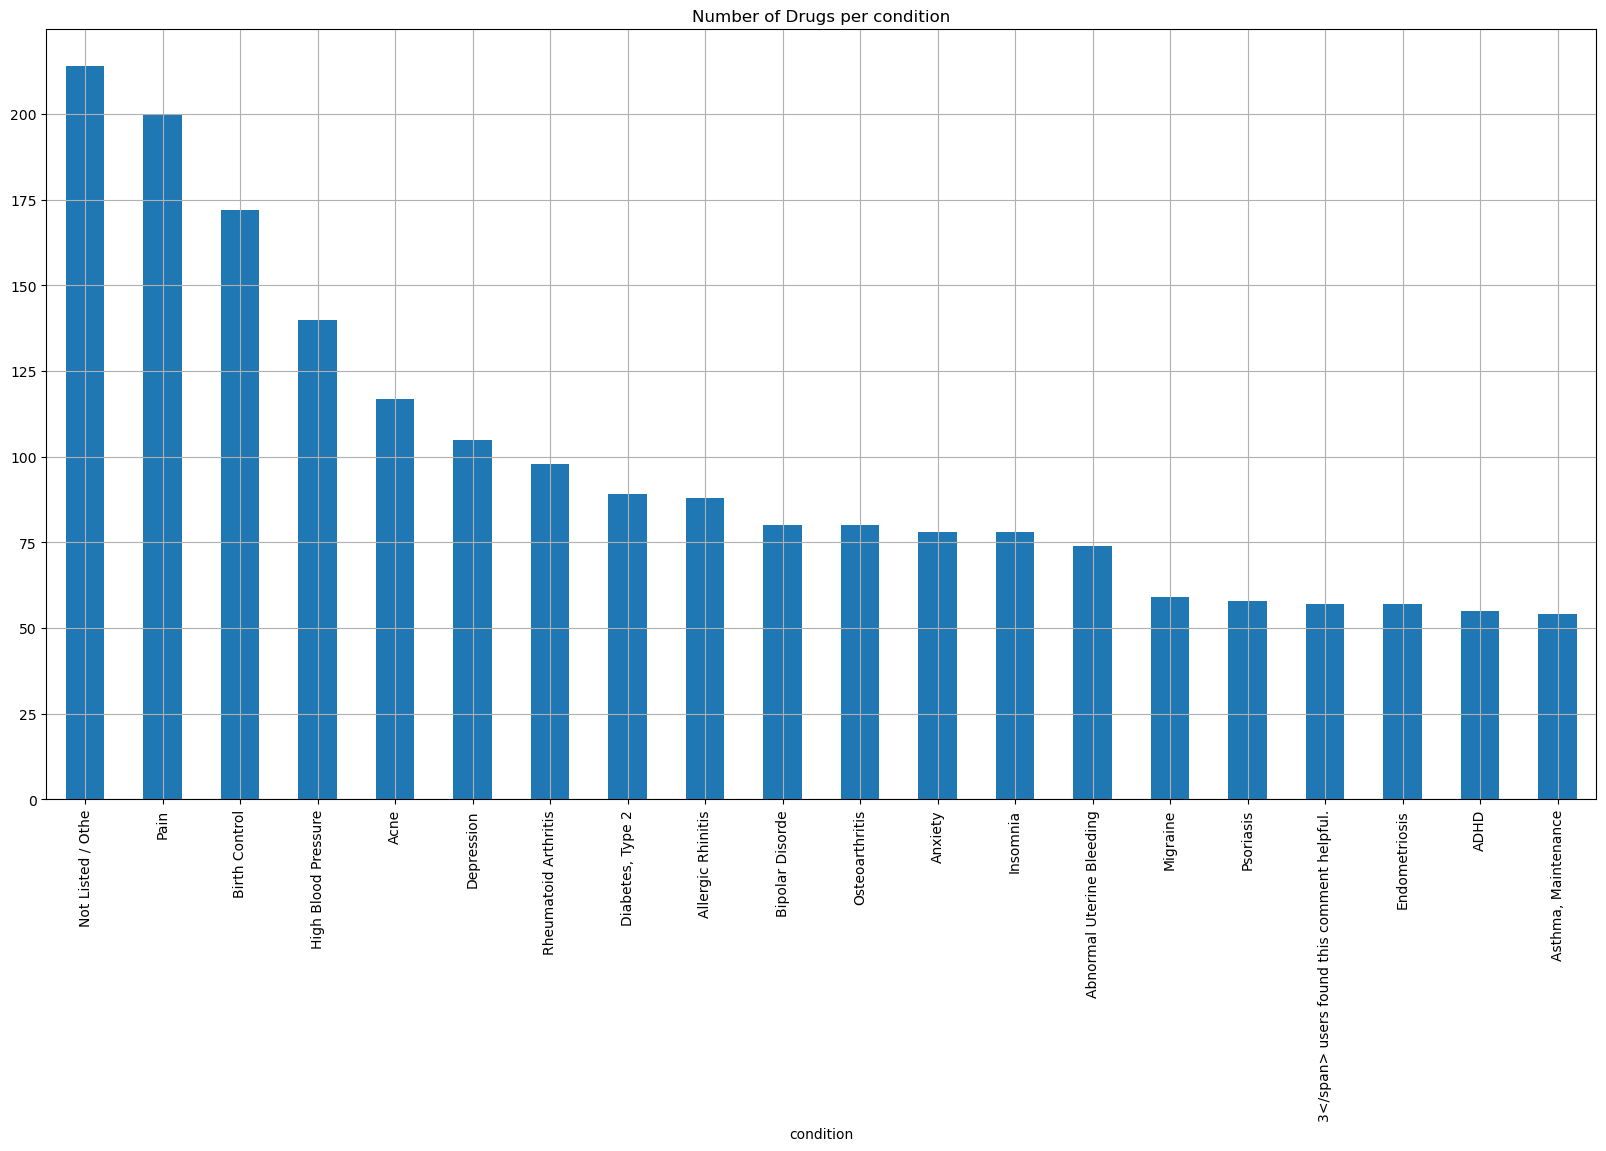

In [39]:
# how many drugs per conditon (plot)
plt.figure(figsize=(15,10))
df.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title('Number of Drugs per condition')
plt.grid()
plt.show()

### Narrative
    * Pain, Birth Control and HBP have the highest number of diferent/unique drugs for their condition

### Question on Rating
    * Distribtuion of Rating
    * Average Rating per count

In [40]:
df['rating'].head()

0    9
1    8
2    5
3    8
4    9
Name: rating, dtype: int64

<Axes: xlabel='rating'>

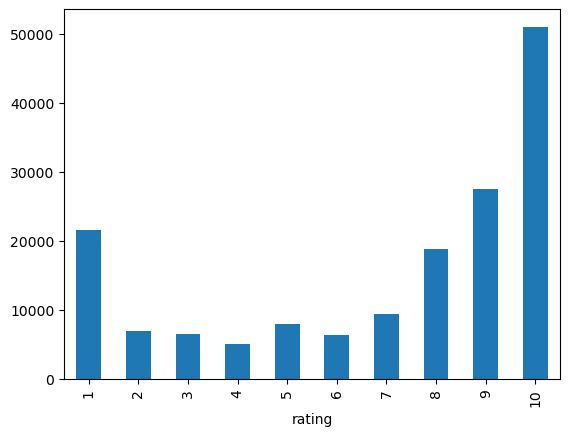

In [43]:
# distribution of rating by size (barplot)
df.groupby('rating').size().plot(kind='bar')

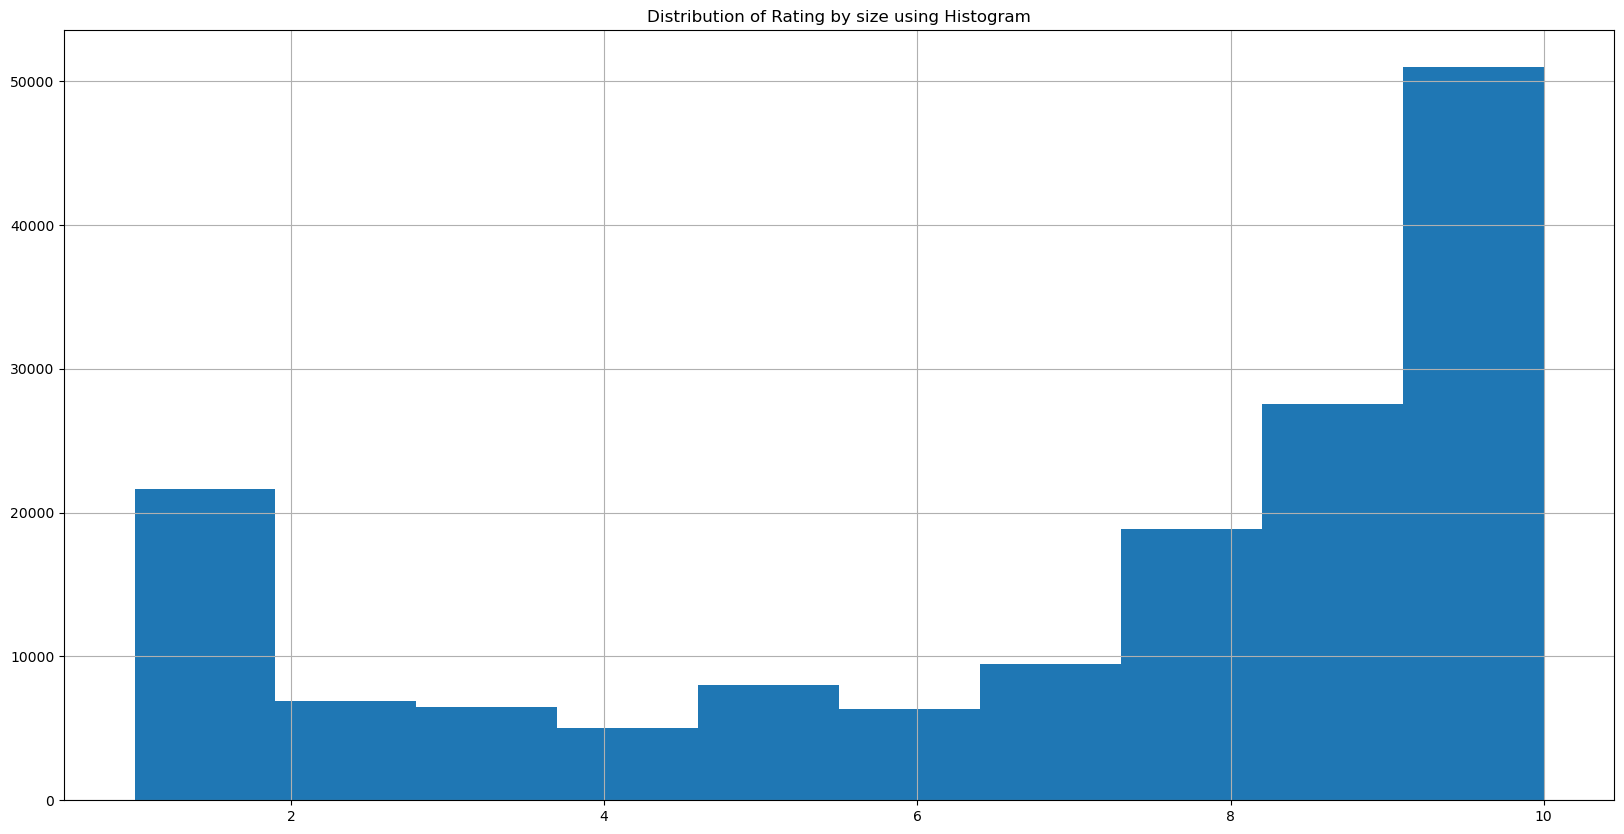

In [44]:
# distribution of rating by size (histogram)
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.title("Distribution of Rating by size using Histogram")
plt.show()

### Narrative
    * Most people rated at the extremes

In [45]:
# Average rating of drugs
avg_rating = (df['rating'].groupby(df['drugName']).mean())

In [46]:
avg_rating

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

In [47]:
# Average rating of drugs by class
avg_rating_per_drug_class = (df['rating'].groupby(df['drug_class']).mean())

In [48]:
avg_rating_per_drug_class

drug_class
ace inhibitor                        5.759259
alpha blocker                        6.954248
anesthetic                           5.937984
anti-anxiety                         8.543667
antibiotic                           6.500735
antibiotic (cephalosporins)          6.344828
antibiotic(penicillins)              7.033613
anticoagulants                       9.222222
antifungal (except metronidazole)    5.580100
antipyschotics (phenothiazine)       7.146084
arb blocker                          6.464286
barbiturate                          8.894737
beta blocker                         6.587629
beta blockers                        7.681159
calcium channel blocker              5.725322
corticosteroid (prednisone)          7.477427
h2 blockers (anti-ulcers)            7.280945
neuromuscular blocking agents        8.622222
opiod analgesics                     7.446388
oral hypoglycemics                   7.268917
pituitary hormone                    8.500000
thrombolytics          

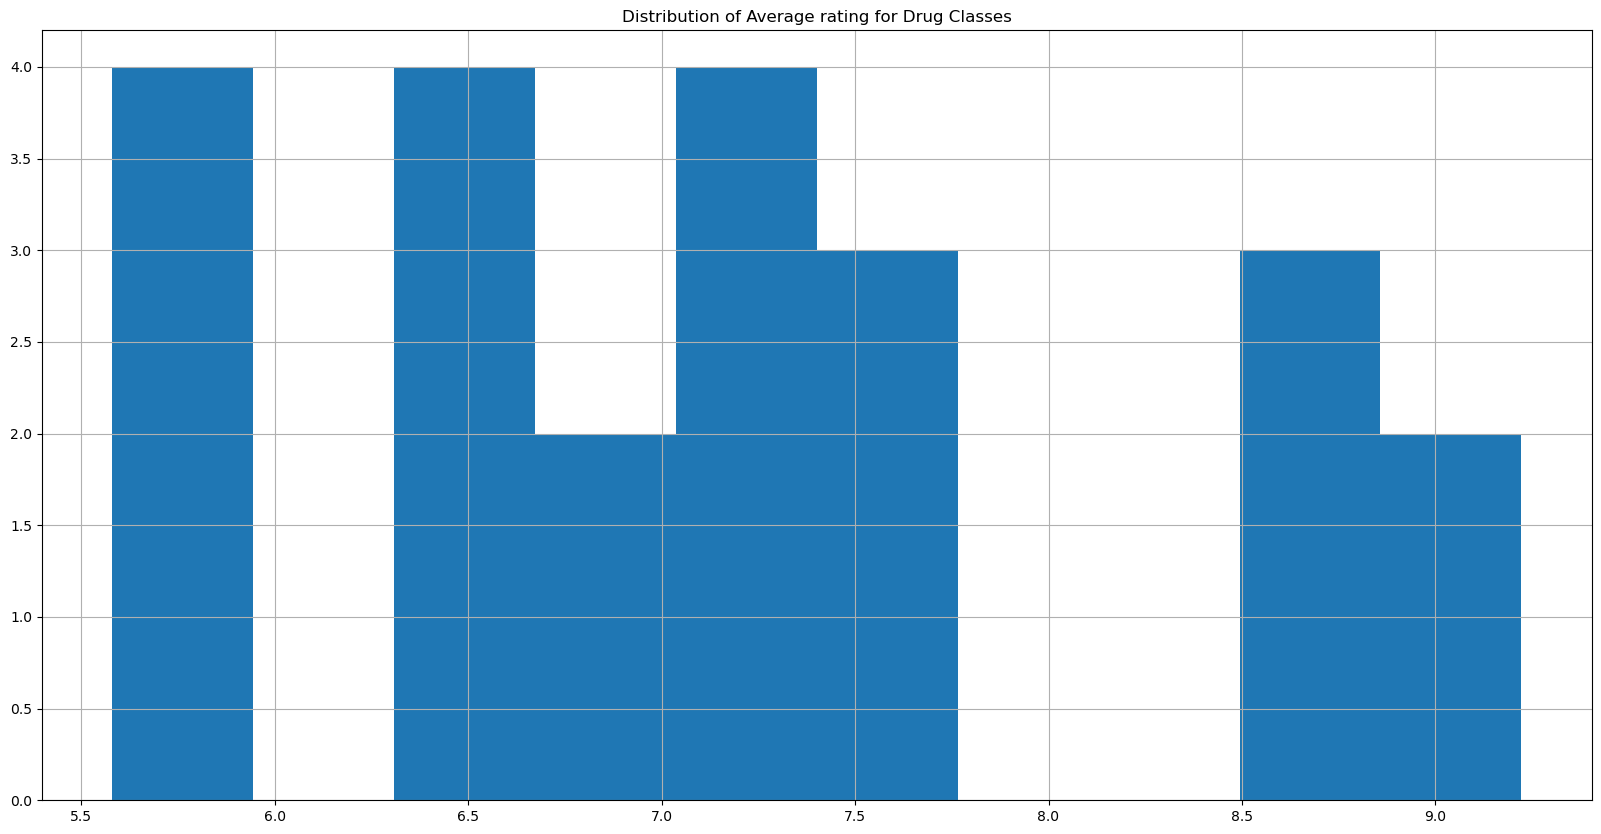

In [49]:
# Average rating for aal drugs
plt.figure(figsize=(20,10))
avg_rating_per_drug_class.hist()
plt.title('Distribution of Average rating for Drug Classes')
plt.show()

In [50]:
# Which group of drugs have the highest mean/average rating
avg_rating_per_drug_class.nlargest(20)

drug_class
anticoagulants                    9.222222
barbiturate                       8.894737
neuromuscular blocking agents     8.622222
anti-anxiety                      8.543667
pituitary hormone                 8.500000
beta blockers                     7.681159
corticosteroid (prednisone)       7.477427
opiod analgesics                  7.446388
h2 blockers (anti-ulcers)         7.280945
oral hypoglycemics                7.268917
antipyschotics (phenothiazine)    7.146084
thrombolytics                     7.103448
antibiotic(penicillins)           7.033613
alpha blocker                     6.954248
beta blocker                      6.587629
antibiotic                        6.500735
arb blocker                       6.464286
antibiotic (cephalosporins)       6.344828
anesthetic                        5.937984
ace inhibitor                     5.759259
Name: rating, dtype: float64

In [51]:
# Which Drugs have the higest mean/average rating
avg_rating.nlargest(20)

drugName
A + D Cracked Skin Relief                              10.0
A / B Otic                                             10.0
Absorbine Jr.                                          10.0
Accolate                                               10.0
Acetaminophen / caffeine / magnesium salicylate        10.0
Acetaminophen / dextromethorphan / doxylamine          10.0
Acetaminophen / phenylephrine                          10.0
Acetaminophen / pseudoephedrine                        10.0
Acetic acid / antipyrine / benzocaine / polycosanol    10.0
Acrivastine / pseudoephedrine                          10.0
Acyclovir / hydrocortisone                             10.0
Advil Cold and Sinus Liqui-Gels                        10.0
Aerobid-M                                              10.0
Afrin 4 Hour Extra Moisturizing                        10.0
Ala-Quin                                               10.0
Alavert                                                10.0
Aldactazide                    

### Questions on Reveiw
    * How genuien is the review? (USing sentiment analysis)
    * How many reviews are positive, negative, neutral?
    * Correlation between rating and review and users whofound the review useful
    * Distribution of rating
    * Amount of review made per year and per month
    * which condition has the most review on drugs
    * Can you predict the rating using the review?

In [52]:
df['review'].head()

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [53]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result ='negative'
    else:
        result = 'neutral'
    return result

In [62]:
# test function
get_sentiment('That is the worst product i have used')

-1.0

In [63]:
# test function
get_sentiment_label('That is the worst product i have used')

'negative'

In [64]:
# Sentiment score for reviews
df['sentiment'] = df['review'].apply(get_sentiment)

In [65]:
# Sentiment label for reviews
df['sentiment_label'] = df['review'].apply(get_sentiment_label)

In [66]:
df[['review','sentiment','sentiment_label']]

,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,neutral
1,"""My son is halfway through his fourth week of ...",0.168333,positive
2,"""I used to take another oral contraceptive, wh...",0.067210,positive
3,"""This is my first time using any form of birth...",0.179545,positive
4,"""Suboxone has completely turned my life around...",0.194444,positive
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",0.262917,positive
161293,"""I was given this in IV before surgey. I immed...",-0.276389,negative
161294,"""Limited improvement after 4 months, developed...",-0.223810,negative
161295,"""I&#039;ve been on thyroid medication 49 years...",0.212597,positive


In [67]:
# How many Positive, negative and neutral reviews?
df['sentiment_label'].value_counts()

positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

<Axes: >

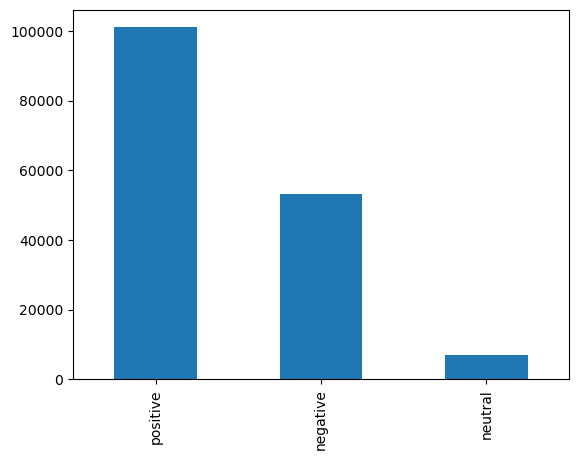

In [68]:
# How many positive and negative and neutral reviews (barplot)
df['sentiment_label'].value_counts().plot(kind='bar')

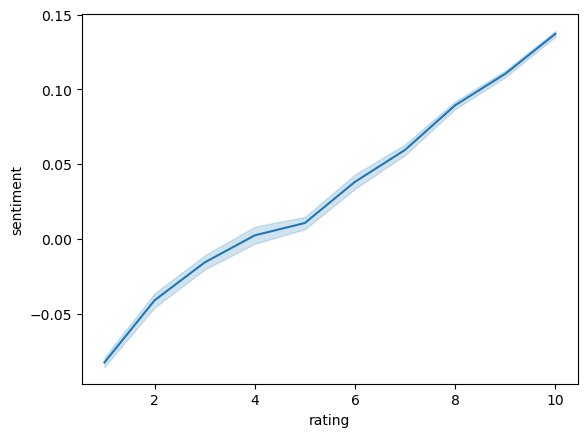

In [69]:
# Correlation between our sentiment and rating
sns.lineplot(data=df,x='rating',y='sentiment')
plt.show()

### Narrative
    * The rating increases with increase in sentiment

<Axes: xlabel='rating', ylabel='sentiment'>

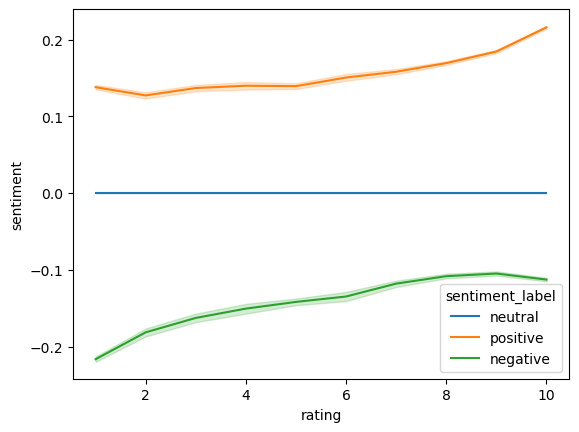

In [70]:
# Correlation between rating and sentiment
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')